### Will a Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaraunt near where you are driving. Would you accept that coupon and take a short detour to the restaraunt? Would you accept the coupon but use it on a sunbsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaraunt? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \\$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\\$20 - \\$50). 

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece. 





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [363]:
# Import all our libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [364]:
df = pd.read_csv('data/coupons.csv')

In [365]:
df.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


In [366]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   destination           12684 non-null  object
 1   passanger             12684 non-null  object
 2   weather               12684 non-null  object
 3   temperature           12684 non-null  int64 
 4   time                  12684 non-null  object
 5   coupon                12684 non-null  object
 6   expiration            12684 non-null  object
 7   gender                12684 non-null  object
 8   age                   12684 non-null  object
 9   maritalStatus         12684 non-null  object
 10  has_children          12684 non-null  int64 
 11  education             12684 non-null  object
 12  occupation            12684 non-null  object
 13  income                12684 non-null  object
 14  car                   108 non-null    object
 15  Bar                   12577 non-null

2. Investigate the dataset for missing or problematic data.

In [367]:
# Check for null values in the dataset
df.isna().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

In [368]:
# Since the car feature is missing so much, check its values to see if they're valuable
df["car"].unique()

array([nan, 'Scooter and motorcycle', 'crossover', 'Mazda5',
       'do not drive', 'Car that is too old to install Onstar :D'],
      dtype=object)

In [369]:
# Get the number of rows in the dataset
len( df )

12684

In [370]:
# Look at how the missing data looks like
df[["Bar","CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50", "Y" ]][df["RestaurantLessThan20"].isna()]

,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,Y
517,NaN,NaN,NaN,NaN,NaN,0
518,NaN,NaN,NaN,NaN,NaN,0
519,NaN,NaN,NaN,NaN,NaN,1
520,NaN,NaN,NaN,NaN,NaN,0
521,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...
8973,never,1~3,4~8,NaN,4~8,0
8974,never,1~3,4~8,NaN,4~8,1
8975,never,1~3,4~8,NaN,4~8,1
8976,never,1~3,4~8,NaN,4~8,1


3. Decide what to do about your missing data -- drop, replace, other...

It seems like the Car feature column has too little data to be useful since the majority is missing. So we will be removing this column.

In [371]:
# Remove the car column
df = df.drop( "car", axis = 1)

As for the NaN for the locations people go to, for now, I'll change it to never. The size of the missing values is small enough comparitively to not have a major impact.

In [372]:
for col in ["Bar","CoffeeHouse", "CarryAway", "RestaurantLessThan20", "Restaurant20To50"]:
    df[col] = df[col].fillna( "never" )

# Check for no null values
df.isna().sum()

destination             0
passanger               0
weather                 0
temperature             0
time                    0
coupon                  0
expiration              0
gender                  0
age                     0
maritalStatus           0
has_children            0
education               0
occupation              0
income                  0
Bar                     0
CoffeeHouse             0
CarryAway               0
RestaurantLessThan20    0
Restaurant20To50        0
toCoupon_GEQ5min        0
toCoupon_GEQ15min       0
toCoupon_GEQ25min       0
direction_same          0
direction_opp           0
Y                       0
dtype: int64

We'll also add a new column to represent if drivers accept/reject the coupon since the "Y" column is too ambiguous

In [373]:
df["Accepted Coupon"] = df["Y"].replace( {1: "Yes", 0:"No"})
df["Accepted Coupon"]

0        Yes
1         No
2        Yes
3         No
4         No
        ... 
12679    Yes
12680    Yes
12681     No
12682     No
12683     No
Name: Accepted Coupon, Length: 12684, dtype: object

4. What proportion of the total observations chose to accept the coupon? 



In [374]:
print( "Number of acceptances:",df.value_counts( "Accepted Coupon" )["Yes"] )
print( "Total number of observations:", len( df ) )
print( "Proportion of acceptances:", df.value_counts( "Accepted Coupon" )["Yes"] / len( df ) )

Number of acceptances: 7210
Total number of observations: 12684
Proportion of acceptances: 0.5684326710816777


5. Use a bar plot to visualize the `coupon` column.

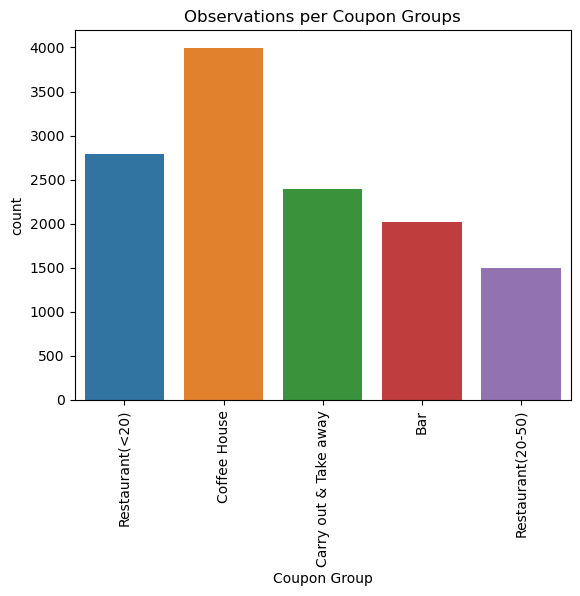

In [375]:
# Use countplot since we're using the count as the y-axis
sns.countplot( data = df, x = "coupon" )
plt.xticks( rotation = 90 )
plt.title( "Observations per Coupon Groups" )
plt.xlabel( "Coupon Group" )
plt.savefig( "images/couponGroups.png" )
print()

6. Use a histogram to visualize the temperature column.

C:\Users\Derek\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


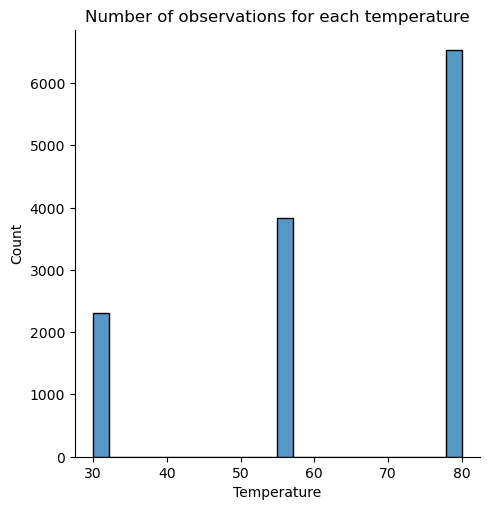

In [376]:
sns.displot( data = df, x = df["temperature"] )
plt.title( "Number of observations for each temperature" )
plt.xlabel( "Temperature" )
print()

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [377]:
barCoupons = df[df["coupon"] == "Bar"]

# Get the size of the dataframe for sanity checking
len( barCoupons )

2017

2. What proportion of bar coupons were accepted?


In [378]:
# # of Yes's divided by total size
barCoupons.value_counts( "Accepted Coupon" )["Yes"] / len( barCoupons )

0.41001487357461575

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [379]:
# Since we will be retrieving the acceptance rate many times throughout this analysis, we'll shorten it to a callable method
def getAcceptanceRate( data ):
    print( "Size of df:", len( data ) )
    print( "Acceptance Rate:", data.value_counts( "Accepted Coupon" )["Yes"] / len( data ) )
    print()

In [380]:
# Filter out the df's for each part and measure their acceptance rate
visitedBarMoreThan3 = barCoupons[barCoupons["Bar"].isin(["4~8", "gt8"])]
print( "Drivers who went to a bar more than 3 times" )
getAcceptanceRate( visitedBarMoreThan3 )

visitedBarLessThan3 = barCoupons[~barCoupons["Bar"].isin(["4~8", "gt8"])]
print( "Drivers who went to a bar 3 times or less" )
getAcceptanceRate( visitedBarLessThan3 )

Drivers who went to a bar more than 3 times
Size of df: 199
Acceptance Rate: 0.7688442211055276

Drivers who went to a bar 3 times or less
Size of df: 1818
Acceptance Rate: 0.37073707370737075



There looks to be a significant increase in accepted coupons if the driver frequents bars often. However the amount of data is very small, so it might be inaccurate

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [381]:
# Get all unique values for age to use for filtering
barCoupons["age"].unique()

array(['21', '46', '26', '31', '41', '50plus', '36', 'below21'],
      dtype=object)

In [382]:
visitedBarMoreThan1 = ["1~3","gt8","4~8"]
agesOver25 = ["46","26","31","41","50plus"]
drivers = barCoupons.query( "Bar in @visitedBarMoreThan1 and age in @agesOver25" )

print( ">25 Driver bar visitors:" )
getAcceptanceRate( drivers )

print( "All bar coupon drivers" )
getAcceptanceRate( barCoupons )


>25 Driver bar visitors:
Size of df: 380
Acceptance Rate: 0.7157894736842105

All bar coupon drivers
Size of df: 2017
Acceptance Rate: 0.41001487357461575



Older drivers that frequent bars often accept the coupons a lot more.

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry. 


In [383]:
# Get all unique values for each feature to accurately filter the df
print( df["passanger"].unique() )
print( df["occupation"].unique()  )

['Alone' 'Friend(s)' 'Kid(s)' 'Partner']
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social Science' 'Personal Care & Service'
 'Community & Social Services' 'Office & Administrative Support'
 'Construction & Extraction' 'Legal' 'Retired'
 'Installation Maintenance & Repair' 'Transportation & Material Moving'
 'Business & Financial' 'Protective Service'
 'Food Preparation & Serving Related' 'Production Occupations'
 'Building & Grounds Cleaning & Maintenance' 'Farming Fishing & Forestry']


In [384]:
nonKidPassengers = ["Friend(s)","Partner"]

# We reuse visitedBarMoreThan1 from the previous problem
drivers2 = barCoupons.query( "Bar in @visitedBarMoreThan1 and passanger in @nonKidPassengers and occupation != 'Farming Fishing & Forestry'")
print( "Drivers who frequent bars often with no kid passengers and non farming/fishing/forestry occupation" )
getAcceptanceRate( drivers2 )

Drivers who frequent bars often with no kid passengers and non farming/fishing/forestry occupation
Size of df: 195
Acceptance Rate: 0.717948717948718



6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K. 



In [385]:
# Again, we get all unique values to accurately create the filters
print( barCoupons["maritalStatus"].unique()  )
print( barCoupons["RestaurantLessThan20"].unique() )
print( barCoupons["income"].unique() )

['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']
['4~8' '1~3' 'less1' 'gt8' 'never']
['$37500 - $49999' '$62500 - $74999' '$12500 - $24999' '$75000 - $87499'
 '$50000 - $62499' '$25000 - $37499' '$100000 or More' '$87500 - $99999'
 'Less than $12500']


In [386]:
# For the first query, it is very similar to the previous problem, we just replace the occcupation statement with a widowed one instead
df1 = barCoupons.query( "Bar in @visitedBarMoreThan1 and passanger in @nonKidPassengers and maritalStatus != 'Widowed'")
print( "Drivers who frequent bars more than once a month, has no kid passengers, and is not widowed" )
getAcceptanceRate( df1 )

agesBelow30 = ["21", "below21", "26"]
df2 = barCoupons.query( "Bar in @visitedBarMoreThan1 and age in @agesBelow30" )
print( "Drivers who frequent bars more than once a month and are below the age of 30" )
getAcceptanceRate( df2 )

visitedRestaurantMoreThan4 = ["4~8","gt8"]
incomeLessThan50k = ["$37500 - $49999",'$12500 - $24999','$25000 - $37499','Less than $12500']
df3 = barCoupons.query( "RestaurantLessThan20 in @visitedRestaurantMoreThan4 and income in @incomeLessThan50k" )
print( "Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50k")
getAcceptanceRate( df3 )

Drivers who frequent bars more than once a month, has no kid passengers, and is not widowed
Size of df: 195
Acceptance Rate: 0.717948717948718

Drivers who frequent bars more than once a month and are below the age of 30
Size of df: 345
Acceptance Rate: 0.7217391304347827

Drivers who go to cheap restaurants more than 4 times a month and have an income less than 50k
Size of df: 344
Acceptance Rate: 0.45348837209302323



7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

From these observations, we can see that drivers that frequent bars more often a month have a higher acceptance of the coupons. In addition, it seems like drivers that don't have a high income and frequent cheap restaurarnts don't accept the coupon as much. Lastly, it does seem like drivers with non-kid passengers accepted it more often as well.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

<h1> I will be investigating the Coffee House coupon group

<h3> Question to answer: What factors help determine drivers that accept coffee house coupons?

<b>Retrieving the data and conducting initial analysis

In [387]:
# Filter the original df with only coffee house coupons
coffee = df[df["coupon"] == "Coffee House"]

In [388]:
# Get the total acceptance rate of the coffee house coupon group
getAcceptanceRate( coffee )

Size of df: 3996
Acceptance Rate: 0.49924924924924924



<b> Now we start comparing acceptance rates with how often drivers visit coffee houses

Lets look at each category:

<b> First is looking at how often drivers visit coffee houses per month

If a driver goes to coffee houses multiple times a month, then they do have an incentive to accept the coupon

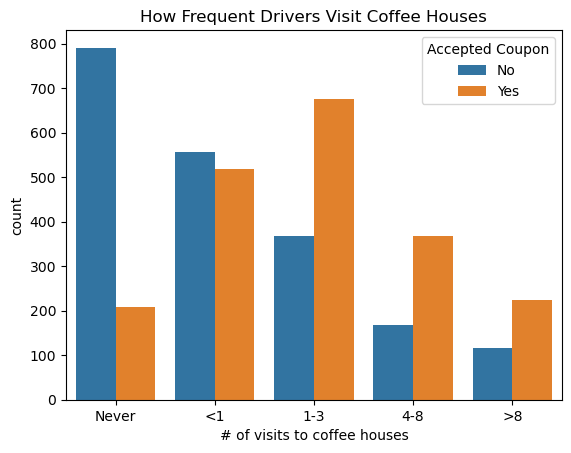

In [389]:
# Plot a bar plot of the driver's visits to coffee houses per month and order it by frequency
plot = sns.countplot( data = coffee, x = "CoffeeHouse", hue = "Accepted Coupon", order = ["never","less1","1~3","4~8","gt8"] )
plt.xlabel( "# of visits to coffee houses" )
plt.title( "How Frequent Drivers Visit Coffee Houses" )
plot.set_xticklabels(["Never","<1","1-3","4-8",">8"])
plt.savefig( "images/coffeeHouseVisits.png" )
print()

In [390]:
# We see that once the visits reaches 1 or more, the acceptance rate is a lot higher, so lets calculate the exact acceptance rates
yearsGreaterThan1 = ["1~3","4~8","gt8"]

# We filter the coffee df by visits >= 1
greaterThanOneYear = coffee.query( "CoffeeHouse in @yearsGreaterThan1" )
print( "Drivers that visit coffee houses at least once a month" )
getAcceptanceRate( greaterThanOneYear )

# We do the opposite for visits < 1
lessThanOneYear = coffee.query( "CoffeeHouse not in @yearsGreaterThan1" )
print( "Drivers that visit coffee houses less than once a month" )
getAcceptanceRate( lessThanOneYear )

Drivers that visit coffee houses at least once a month
Size of df: 1922
Acceptance Rate: 0.6602497398543185

Drivers that visit coffee houses less than once a month
Size of df: 2074
Acceptance Rate: 0.3500482160077146



As we can see from the graph and the acceptance rates, drivers who visit coffee houses at least once a month have a lot higher likelihood of accepting the coupon, and vice-versa.

<b> What about other factors such as age?

Does age determine if the driver takes the coupon?

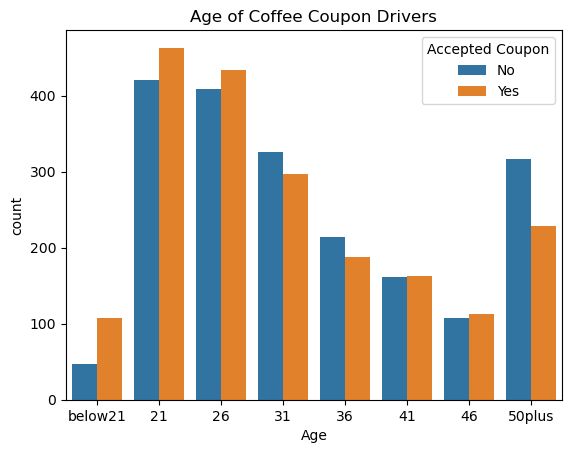

In [391]:
# We first plot it to see how it looks
sns.countplot( data = coffee, x = "age", order = ["below21","21","26","31","36","41","46","50plus"], hue = "Accepted Coupon" )
plt.xlabel( "Age" )
plt.title( "Age of Coffee Coupon Drivers" )
plt.savefig( "images/coffeeAge.png" )
print()

Seems like age doesn't really impact how often drivers go to Coffee Houses besides for those below 21 years old and those above 50 years old. Interestingly, the data seems skewed with majority of observations being of drivers in their twenties or 50 plus.

In [392]:
# Lets get the acceptance rate of drivers above 50 years old and below 21 years old
ageAbove50 = coffee.query( "age == '50plus'" )
print( "Drivers above 50 years old" )
getAcceptanceRate( ageAbove50 )

ageNotAbove50 = coffee.query( "age != '50plus'" )
print( "Drivers below age 50" )
getAcceptanceRate( ageNotAbove50 )

ageBelow21 = coffee.query( "age == 'below21'" )
print( "Drivers below 21 years old" )
getAcceptanceRate( ageBelow21 )

Drivers above 50 years old
Size of df: 545
Acceptance Rate: 0.42018348623853213

Drivers below age 50
Size of df: 3451
Acceptance Rate: 0.5117357287742683

Drivers below 21 years old
Size of df: 155
Acceptance Rate: 0.6967741935483871



Based on the calculated acceptance rates, it seems like <21 year old drivers have a significantly higher acceptance rate, while drivers >50 years old have a lower acceptance rate. Though this is pretty promising, the amount of data for drivers below 21 years old is very small, potentially meaning the data might not be very accurate. Thus, this should be taken with a grain of salt when examining factors. However, there does seem to be enough data for drivers above 50 years old, so we can more confidently state that these drivers will be less inclined to accept the coffee house coupons. Though the impact is not very large, it still is a small improvement in acceptance rate.

<b>Does weather affect coupon acceptance?

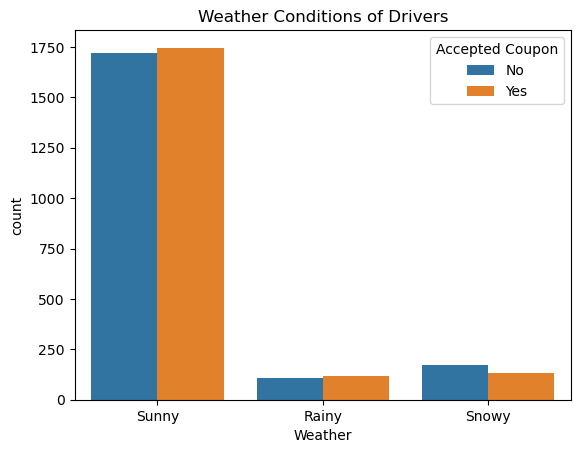

In [393]:
# We again plot the bar plot for an easy overview
sns.countplot( data = coffee, x = "weather", hue = "Accepted Coupon" )
plt.xlabel( "Weather" )
plt.title( "Weather Conditions of Drivers" )
print()

Not particularly

<b> What about for gender?

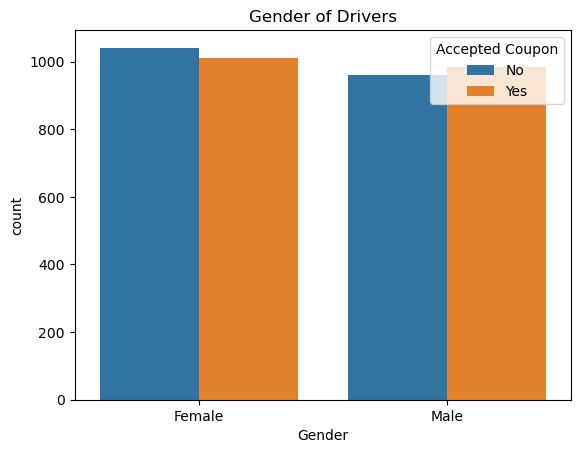

In [394]:
# Same as above
sns.countplot( data = coffee, x = "gender", hue = "Accepted Coupon" )
plt.xlabel( "Gender" )
plt.title( "Gender of Drivers" )
print()

Not particularly. In fact, it's almost even with the acceptance rates for both genders

<b> What about for time of day?

Coffee is usually bought during the morning or midday, so perhaps there will be less acceptances for night time?

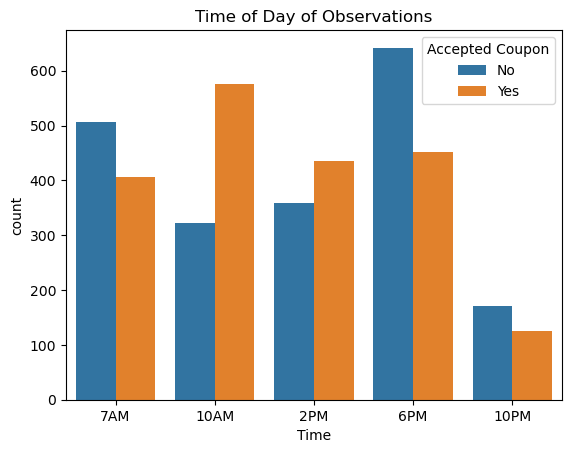

In [395]:
# Again, we plot the bar plot while ordering the time chronologically
sns.countplot( data = coffee, x = "time", hue = "Accepted Coupon", order = ["7AM","10AM","2PM","6PM","10PM"] )
plt.xlabel( "Time" )
plt.title( "Time of Day of Observations" )
plt.savefig( "images/coffeeTime.png" )
print()

In [396]:
# 10AM and 2PM seem to have promising acceptance rates, so lets get some of them
print( "Time at 10AM" )
getAcceptanceRate( coffee.query( "time == '10AM'" ) )

print( "Time at 2PM" )
getAcceptanceRate( coffee.query( "time == '2PM'" ) )

print( "Time at 10AM or 2PM" )
getAcceptanceRate( coffee.query( "time == '2PM' or time == '10AM'" ) )

Time at 10AM
Size of df: 899
Acceptance Rate: 0.6407119021134594

Time at 2PM
Size of df: 794
Acceptance Rate: 0.5478589420654912

Time at 10AM or 2PM
Size of df: 1693
Acceptance Rate: 0.5971647962197283



Based on the data, it does indeed seem like our hypothesis is onto something! The acceptance rates for coupons during 10AM and 2PM are higher than most times of the day, which gives credence to the fact that most drivers need the caffeine during the morning to midday, but not so much for the evening. A reason why drivers at 7AM are not as accepting perhaps might be due to them being busy transiting to work or they could still be asleep.

<b> Perhaps temperature plays a part, since cold weather may invite drivers to get a warm drink

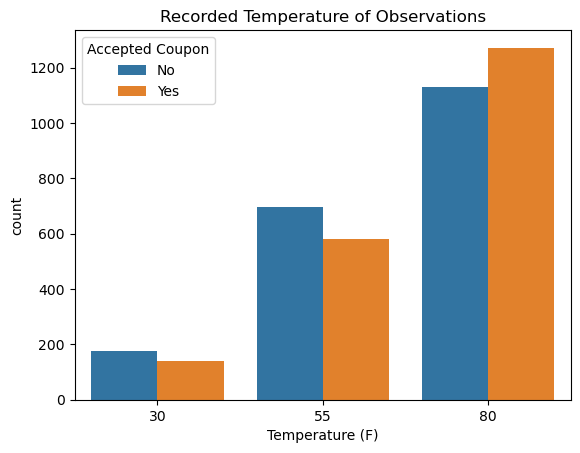

In [397]:
# Same as before, plot the bar plot
sns.countplot( data = coffee, x = "temperature", hue = "Accepted Coupon" )
plt.xlabel( "Temperature (F)" )
plt.title( "Recorded Temperature of Observations" )
print()

Not much of a significant different for each temperature. Though it is interesting how more drivers accepted the coupon for coffee houses in 80F weather than rejected them. Perhaps in the region where the data was collected, drivers enjoy drinking warm drinks in warm weather?

<b> What about for destination?

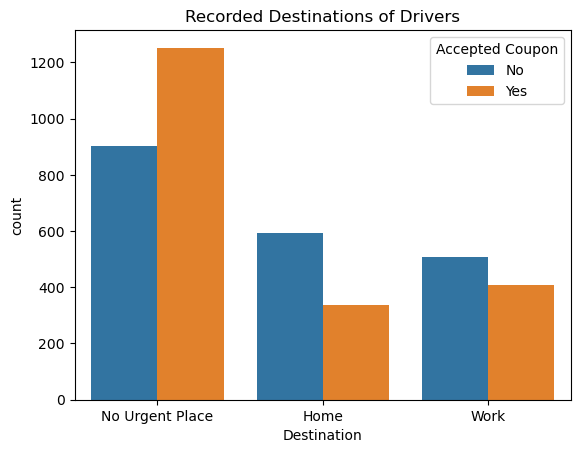

In [398]:
sns.countplot( data = coffee, x = "destination", hue = "Accepted Coupon" )
plt.xlabel( "Destination" )
plt.title( "Recorded Destinations of Drivers" )
plt.savefig( "images/coffeeDestination.png" )
print()

In [399]:
# Lets get a clear acceptance rate of drivers with the no urgent place as their destination
print( "Drivers with no urgent place to go to" )
getAcceptanceRate( coffee.query( "destination == 'No Urgent Place'" ) )

Drivers with no urgent place to go to
Size of df: 2155
Acceptance Rate: 0.5809744779582366



It seems like drivers accept the coupon more often when they have no urgent place to go to. This would seem to make sense since drivers would not want a detour to go to a coffee house. This also seems to imply that when the driver does have a destination to go to, receiving a coupon is not worth the time or consideration at the moment.

<b>Would going the same direction encourage drivers to accept the coupon?

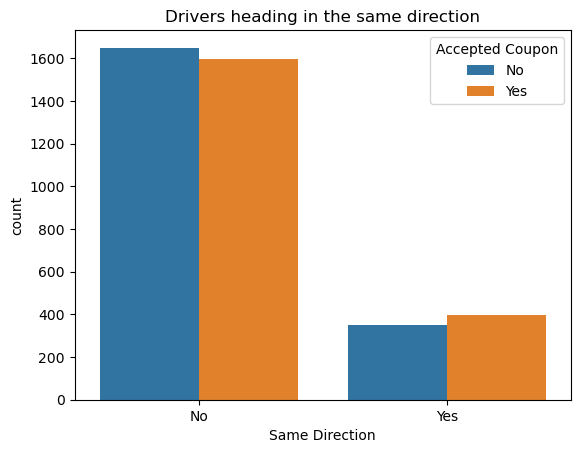

In [400]:
plot = sns.countplot( data = coffee, x = "direction_same", hue = "Accepted Coupon" )
plt.xlabel( "Same Direction" )
plt.title( "Drivers heading in the same direction" )
plot.set_xticklabels(["No", "Yes"] )
print()

Not particularly. So we can see that direction isn't the main factor for having drivers accept coupons for coffee houses

<b> What about for income? Coffee houses are more of a luxury expense, so perhaps drivers with more income will accept more often?

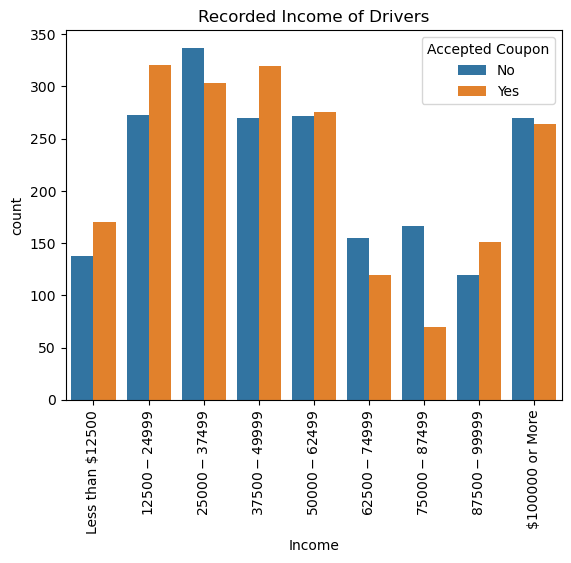

In [401]:
# We order the income numerically so it's easier to interpret
sns.countplot( data = coffee, x = "income", hue = "Accepted Coupon", order=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'] )
plt.xticks( rotation = 90 )
plt.xlabel( "Income" )
plt.title( "Recorded Income of Drivers" )
plt.savefig( "images/coffeeDestination.png" )
print()

From a quick peak, it seems like drivers with less income seem to accept the coupon more often. This is probably due to them wanting to save money with the coupon at the coffee house.

Lets split the income to those below 62500 and those above to clearly see the difference

In [402]:
incomesAbove62500 = ['$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More']
below62500 = coffee.query( "income not in @incomesAbove62500" )
above62500 = coffee.query( "income in @incomesAbove62500" )

print( "Incomes < 62500")
getAcceptanceRate( below62500 )

print( "Incomes >= 62500" )
getAcceptanceRate( above62500 )

Incomes < 62500
Size of df: 2680
Acceptance Rate: 0.5186567164179104

Incomes >= 62500
Size of df: 1316
Acceptance Rate: 0.45972644376899696



Though the acceptance rate is not very impressive, relatively, we can see that drivers with less income definitely accept the coupon more often than drivers with more income.

<B>What about occupation, does it impact drivers?

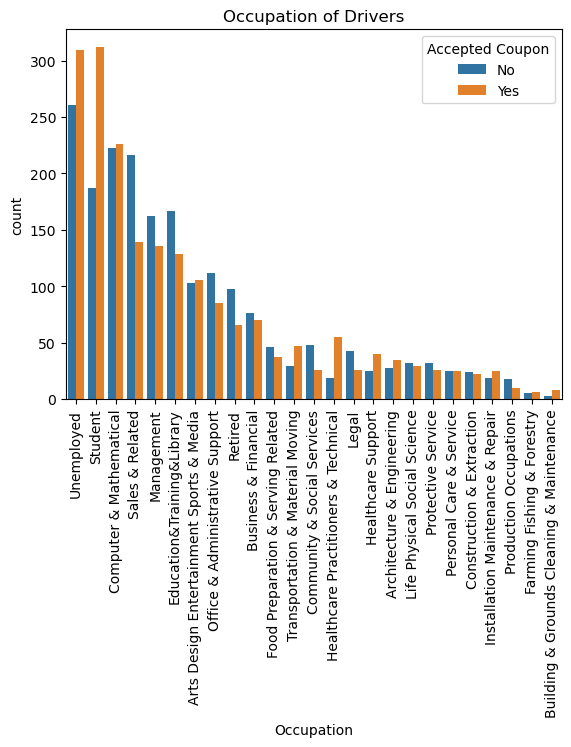

In [403]:
# We sort the x axis by the amount of values so it's easier to view
sns.countplot( data = coffee, x = "occupation", hue = "Accepted Coupon", order = coffee.value_counts( "occupation" ).index )
plt.xticks( rotation = 90 )
plt.xlabel( "Occupation" )
plt.title( "Occupation of Drivers" )
plt.savefig( "images/coffeeOccupation.png" )
print()

From this, we can definitely see some occupations that have a higher acceptance than most other occupations:
* Unemployed
* Student
* Healthcare Practitioners & Technical
* Healthcare Support
* Building & Grounds Cleaning & Maintenance
* Transportation & Material Moving

Lets look at their exact acceptance rates:

In [404]:
# We create a list with these potential occupations
potentialOccupations = ["Unemployed","Student","Healthcare Practitioners & Technical", "Healthcare Support", "Building & Grounds Cleaning & Maintenance", "Transportation & Material Moving"]

# Then we calculate the acceptance rate for each one
for occupation in potentialOccupations:
    print( "For occupation:", occupation )
    getAcceptanceRate( coffee.query( "occupation == @occupation" ) )

For occupation: Unemployed
Size of df: 570
Acceptance Rate: 0.5421052631578948

For occupation: Student
Size of df: 499
Acceptance Rate: 0.625250501002004

For occupation: Healthcare Practitioners & Technical
Size of df: 74
Acceptance Rate: 0.7432432432432432

For occupation: Healthcare Support
Size of df: 65
Acceptance Rate: 0.6153846153846154

For occupation: Building & Grounds Cleaning & Maintenance
Size of df: 11
Acceptance Rate: 0.7272727272727273

For occupation: Transportation & Material Moving
Size of df: 76
Acceptance Rate: 0.618421052631579



In [405]:
# Since unemployed is such a big factor and does not have as high of an acceptance rate as the others, we calculate the total acceptance rate with and without it
print( "All potential occupations:" )
getAcceptanceRate( coffee.query( "occupation in @potentialOccupations" ) )

print( "All potential occupations except unemployed" )
getAcceptanceRate( coffee.query( "occupation in @potentialOccupations and occupation != 'Unemployed'" ) )

All potential occupations:
Size of df: 1295
Acceptance Rate: 0.5953667953667954

All potential occupations except unemployed
Size of df: 725
Acceptance Rate: 0.6372413793103449



As we can see, the acceptance rates are pretty high for each individual occupation. This would make sense since these occupations often have long hours, which might entice drivers to go to coffee houses to work or get coffee. Though looking at these occupations, we can check for income to see if they accept the coupon due to low income:

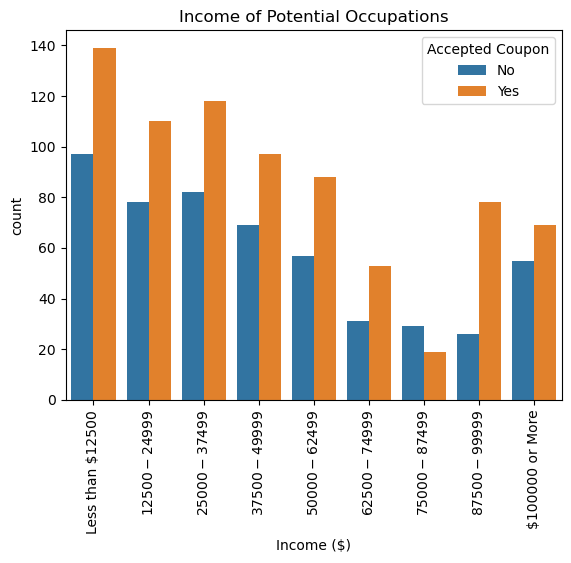

In [406]:
# Filter with only potential occupations, then plot it
occupations = coffee.query( "occupation in @potentialOccupations" )
sns.countplot( data = occupations, x = "income", hue = "Accepted Coupon", order=['Less than $12500','$12500 - $24999','$25000 - $37499','$37500 - $49999','$50000 - $62499','$62500 - $74999','$75000 - $87499','$87500 - $99999','$100000 or More'] )
plt.xticks( rotation = 90 )
plt.xlabel( "Income ($)" )
plt.title( "Income of Potential Occupations" )
plt.savefig( "images/coffeeOccupationIncome.png" )
print()

For these occupations, it seems like for every income (besides 75000 - 87499), more drivers accept the coupon than reject it. Strangely, drivers with income between 87500 - 99999 have a significantly high acceptance rate. Perhaps we should look more into this:

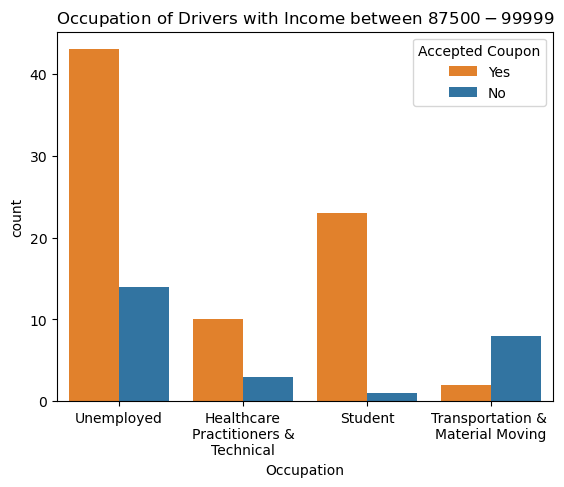

In [407]:
# Filter our potential occupations with just the 87500-99999 income slice, then look at the data
coffeeCouponLovers = occupations[occupations["income"] == '$87500 - $99999' ]
plot = sns.countplot( data = coffeeCouponLovers, x = "occupation", hue = "Accepted Coupon", palette = ['tab:orange', 'tab:blue'] )
plot.set_xticklabels( ["Unemployed","Healthcare\nPractitioners &\nTechnical","Student", "Transportation & \nMaterial Moving"]  )
plt.xlabel( "Occupation" )
plt.title( "Occupation of Drivers with Income between $87500 - $99999" )
plt.savefig( "images/coffeeIncomeOccupation.png" )
print()

Surprisingly, the majority of these coffee house lovers are unemployed. Though how they have such high income unemployed is strange. However, currently, we don't have enough data to deduce this strange unemployed group

<b> Lastly, lets have a quick peak at education

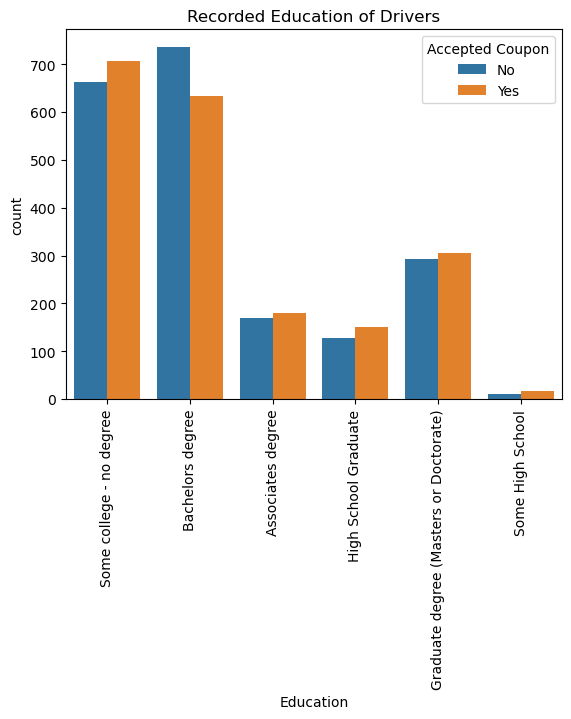

In [412]:
sns.countplot( data = coffee, x = "education", hue = "Accepted Coupon" )
plt.xticks( rotation = 90 )
plt.xlabel( "Education" )
plt.title( "Recorded Education of Drivers" )
plt.savefig( "images/coffeeEducation.png" )
print()

It seems like only drivers with bachelors degrees decline the coupon more than accept it. Lets look at the actual numerical values to see if this is a noticeable factor.

In [409]:
# Get the filtered df's and get their acceptance rates
bachelors = coffee.query( "education == 'Bachelors degree'" )
nonBachelors = coffee.query( "education != 'Bachelors degree'")

print( "Bachelors degree education" )
getAcceptanceRate( bachelors )

print( "Non-Bachelors degree education")
getAcceptanceRate( nonBachelors )

Bachelors degree education
Size of df: 1370
Acceptance Rate: 0.46277372262773725

Non-Bachelors degree education
Size of df: 2626
Acceptance Rate: 0.5182787509520183



Although those with bachelors degrees do have a slight lower acceptance rate than the total acceptance rate, it isn't a huge sign/factor for determining acceptance rate. Though this may be worth investigating later on to see if education really does have some impact.

<h2> Summarization of all of our findings for the coffee house group:

Lets first list all the factors that seem to affect coupon acceptance rate:
* Drivers who frequent coffee houses at least once a month
* The driver is NOT 50+ years old
* The time is in the late morning (10AM) or early afternoon (2PM)
* Income is below $62500
* The driver does not have an urgent destination to go to
* The driver is in one of these occupations:
    - Unemployed
    - Student
    - Healthcare Practitioners & Technical
    - Healthcare Support
    - Building & Grounds Cleaning & Maintenance
    - Transportation & Material Moving

Lets make a visualization of each individual factor's acceptance rate to see how significant they are

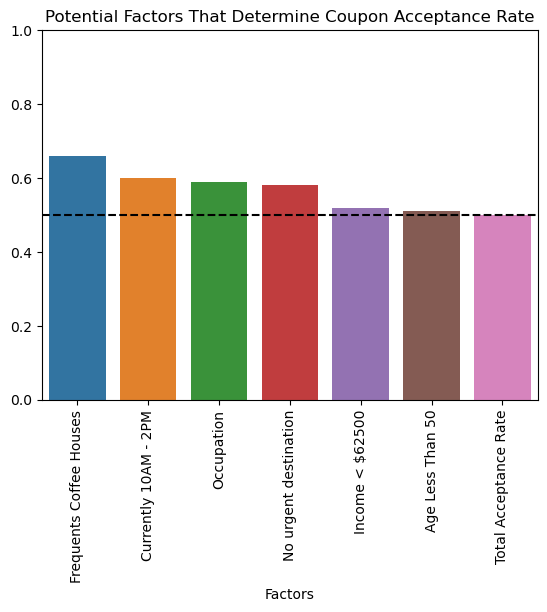

In [410]:
# We make a our own tiny df with the factor along with the acceptance rate
# In addition, we add the total acceptance rate for comparison
factors = {"Factor" : ["Frequents Coffee Houses","Currently 10AM - 2PM", "Income < $62500","No urgent destination", "Occupation","Total Acceptance Rate", "Age Less Than 50"], "Acceptance Rate": [0.66, 0.60, 0.52, 0.58, 0.59, 0.5, 0.51] }

# We sort the order by acceptance rates
plot = sns.barplot( data = factors, x = "Factor", y = "Acceptance Rate", order = ["Frequents Coffee Houses","Currently 10AM - 2PM", "Occupation","No urgent destination", "Income < $62500","Age Less Than 50", "Total Acceptance Rate"] )
plot.axhline( 0.5, color = "black", linestyle ="--") # We also draw a line on the total acceptance rate so it's more noticeable
plt.xticks( rotation = 90)
plt.ylim(0,1)
plt.xlabel( "Factors" )
plt.title( "Potential Factors That Determine Coupon Acceptance Rate")
plt.savefig( "images/factorAcceptanceRates.png" )
print()

With these criteria, lets try filtering the coffee coupon data with these factors to see the total acceptance rate:

In [411]:
# Use query to filter everything and see how it goes
coffeeLovers = coffee.query( """
                            CoffeeHouse in @years and \
                            ( time == '10AM' or time == '2PM' ) and \
                            income not in @above62500incomes and \
                            destination == 'No Urgent Place' and \
                            occupation in @potentialOccupations and \
                            age != '50'
                            """)

print( "Coffee Group Drivers filtered by the factors" )
getAcceptanceRate( coffeeLovers )

Coffee Group Drivers filtered by the factors
Size of df: 202
Acceptance Rate: 0.8168316831683168



With a very high acceptance rate of 0.809, we can see that these factors do indeed have a significant impact on whether drivers accept or recline the coffee house coupons. Thus, when offering coffee house coupons to drivers, companies should pay attention to these factors so that they can have the greatest success.

<h2> Next Steps

With these potential factors, we could focus our research and data collection on them to confirm our hypothesis. For example, perhaps offering more coupons to demographics that share some of these factors and recording more data. Otherwise, coffee house shops would be benefited for appealing coupons to the demographics that follow these factors.

In addition, for the dataset as a whole, there are some demographics that are not represented as much as others. For example, drivers over the age of 40 do not have as much data as younger drivers, meaning we could be losing on some insight in this demographic. Coupon groups also have differing numbers of drivers, making comparisons between them slightly inaccurate. 

Besides that, when conducting data collection next time, there should be a higher emphasis on recording numerical data rather than categorical data for features such as age, income, temperature, and time. While categorical data is very easy to input and collect, numerical data gives a lot more insight and deepter analysis on the dataset as a whole.